In [2]:
from DS_healpix_fragmentation import *
from DS_WCS_projections import show_pic
import numpy as np
import healpy as hp
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import pyplot as plt
from skimage.filters import gaussian
from skimage.draw import circle
import pandas as pd
from astropy.table import Table
from tqdm.notebook import tqdm
from threading import Thread
import os

In [3]:
ra, dec, radius = 194.9356, 28.0256, 1.1

In [26]:
big_nside, big_ipix = find_biggest_pixel(ra, dec, radius)
depth = 12
small_nside = big_nside * (2 ** depth)
small_nside

32768

In [ ]:
big_matr = one_pixel_fragmentation(big_nside, big_ipix, depth)
mdict = matr2dict(big_matr)

In [6]:
coords = draw_proper_circle(ra, dec, small_nside, list(big_matr.shape) + [1], mdict, 1.1)

In [7]:
small_matr = zoom_to_circle(coords, big_matr)

In [8]:
small_dict = matr2dict(small_matr)

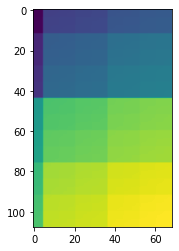

In [9]:
plt.imshow(small_matr)

In [10]:
planck_pic = np.zeros(list(small_matr.shape) + [6])

In [11]:
dirname = '/home/rt2122/Data/Planck/dataframe/'
files = next(os.walk(dirname))[-1]
files

['planck3.csv',
 'planck1.csv',
 'planck5.csv',
 'planck4.csv',
 'planck2.csv',
 'planck0.csv']

In [21]:
for i, file in enumerate(files):
    df = pd.read_csv(os.path.join(dirname, file))
    
    for j in tqdm(range(df.shape[0])):
        pix = df['pix'][i]
        pix = one_pixel_fragmentation(2048, pix, 4).flatten()
        for p in pix:
            if p in small_dict:
                planck_pic[small_dict[p], i] = df['I_STOKES'][i]


1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964
1065053965
1065053976
1065053977
1065053980
1065053981
1065054024
1065054025
1065054028
1065054029
1065054040
1065054041
1065054044
1065054045
1065053962
1065053963
1065053966
1065053967
1065053978
1065053979
1065053982
1065053983
1065054026
1065054027
1065054030
1065054031
1065054042
1065054043
1065054046
1065054047
1065053984
1065053985
1065053988
1065053989
1065054000
1065054001
1065054004
1065054005
1065054048
1065054049
1065054052
1065054053
1065054064
1065054065
1065054068
1065054069
1065053986
1065053987
1065053990
1065053991
1065054002
1065054003
1065054006
1065054007
1065054050
1065054051
1065054054

1065053961
1065053964
1065053965
1065053976
1065053977
1065053980
1065053981
1065054024
1065054025
1065054028
1065054029
1065054040
1065054041
1065054044
1065054045
1065053962
1065053963
1065053966
1065053967
1065053978
1065053979
1065053982
1065053983
1065054026
1065054027
1065054030
1065054031
1065054042
1065054043
1065054046
1065054047
1065053984
1065053985
1065053988
1065053989
1065054000
1065054001
1065054004
1065054005
1065054048
1065054049
1065054052
1065054053
1065054064
1065054065
1065054068
1065054069
1065053986
1065053987
1065053990
1065053991
1065054002
1065054003
1065054006
1065054007
1065054050
1065054051
1065054054
1065054055
1065054066
1065054067
1065054070
1065054071
1065053992
1065053993
1065053996
1065053997
1065054008
1065054009
1065054012
1065054013
1065054056
1065054057
1065054060
1065054061
1065054072
1065054073
1065054076
1065054077
1065053994
1065053995
1065053998
1065053999
1065054010
1065054011
1065054014
1065054015
1065054058
1065054059
1065054062
1065054063

1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964
1065053965
1065053976
1065053977
1065053980
1065053981
1065054024
1065054025
1065054028
1065054029
1065054040
1065054041
1065054044
1065054045
1065053962
1065053963
1065053966
1065053967
1065053978
1065053979
1065053982
1065053983
1065054026
1065054027
1065054030

1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964

1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974

1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115

1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140

1065053986
1065053987
1065053990
1065053991
1065054002
1065054003
1065054006
1065054007
1065054050
1065054051
1065054054
1065054055
1065054066
1065054067
1065054070
1065054071
1065053992
1065053993
1065053996
1065053997
1065054008
1065054009
1065054012
1065054013
1065054056
1065054057
1065054060
1065054061
1065054072
1065054073
1065054076
1065054077
1065053994
1065053995
1065053998
1065053999
1065054010
1065054011
1065054014
1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156

1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186

1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964
1065053965
1065053976
1065053977
1065053980
1065053981
1065054024
1065054025
1065054028
1065054029
1065054040
1065054041
1065054044
1065054045
1065053962
1065053963
1065053966
1065053967
1065053978
1065053979
1065053982
1065053983
1065054026
1065054027
1065054030
1065054031
1065054042
1065054043
1065054046
1065054047
1065053984
1065053985
1065053988
1065053989
1065054000
1065054001
1065054004
1065054005
1065054048
1065054049
1065054052
1065054053
1065054064
1065054065
1065054068
1065054069
1065053986
1065053987
1065053990
1065053991
1065054002
1065054003
1065054006
1065054007
1065054050
1065054051
1065054054
1065054055
1065054066
1065054067
1065054070

1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964
1065053965
1065053976
1065053977
1065053980

1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115

1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115
1065054118
1065054119
1065054130
1065054131
1065054134
1065054135
1065054178
1065054179
1065054182
1065054183
1065054194
1065054195
1065054198
1065054199
1065054120
1065054121
1065054124
1065054125
1065054136
1065054137
1065054140
1065054141
1065054184
1065054185
1065054188
1065054189
1065054200
1065054201
1065054204
1065054205
1065054122
1065054123
1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039

1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180
1065054181
1065054192
1065054193
1065054196
1065054197
1065054114
1065054115

1065054053
1065054064
1065054065
1065054068
1065054069
1065053986
1065053987
1065053990
1065053991
1065054002
1065054003
1065054006
1065054007
1065054050
1065054051
1065054054
1065054055
1065054066
1065054067
1065054070
1065054071
1065053992
1065053993
1065053996
1065053997
1065054008
1065054009
1065054012
1065054013
1065054056
1065054057
1065054060
1065054061
1065054072
1065054073
1065054076
1065054077
1065053994
1065053995
1065053998
1065053999
1065054010
1065054011
1065054014
1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105

1065053994
1065053995
1065053998
1065053999
1065054010
1065054011
1065054014
1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106
1065054107
1065054110
1065054111
1065054154
1065054155
1065054158
1065054159
1065054170
1065054171
1065054174
1065054175
1065054112
1065054113
1065054116
1065054117
1065054128
1065054129
1065054132
1065054133
1065054176
1065054177
1065054180

1065054054
1065054055
1065054066
1065054067
1065054070
1065054071
1065053992
1065053993
1065053996
1065053997
1065054008
1065054009
1065054012
1065054013
1065054056
1065054057
1065054060
1065054061
1065054072
1065054073
1065054076
1065054077
1065053994
1065053995
1065053998
1065053999
1065054010
1065054011
1065054014
1065054015
1065054058
1065054059
1065054062
1065054063
1065054074
1065054075
1065054078
1065054079
1065054080
1065054081
1065054084
1065054085
1065054096
1065054097
1065054100
1065054101
1065054144
1065054145
1065054148
1065054149
1065054160
1065054161
1065054164
1065054165
1065054082
1065054083
1065054086
1065054087
1065054098
1065054099
1065054102
1065054103
1065054146
1065054147
1065054150
1065054151
1065054162
1065054163
1065054166
1065054167
1065054088
1065054089
1065054092
1065054093
1065054104
1065054105
1065054108
1065054109
1065054152
1065054153
1065054156
1065054157
1065054168
1065054169
1065054172
1065054173
1065054090
1065054091
1065054094
1065054095
1065054106

1065054126
1065054127
1065054138
1065054139
1065054142
1065054143
1065054186
1065054187
1065054190
1065054191
1065054202
1065054203
1065054206
1065054207
1065053952
1065053953
1065053956
1065053957
1065053968
1065053969
1065053972
1065053973
1065054016
1065054017
1065054020
1065054021
1065054032
1065054033
1065054036
1065054037
1065053954
1065053955
1065053958
1065053959
1065053970
1065053971
1065053974
1065053975
1065054018
1065054019
1065054022
1065054023
1065054034
1065054035
1065054038
1065054039
1065053960
1065053961
1065053964
1065053965
1065053976
1065053977
1065053980
1065053981
1065054024
1065054025
1065054028
1065054029
1065054040
1065054041
1065054044
1065054045
1065053962
1065053963
1065053966
1065053967
1065053978
1065053979
1065053982
1065053983
1065054026
1065054027
1065054030
1065054031
1065054042
1065054043
1065054046
1065054047
1065053984
1065053985
1065053988
1065053989
1065054000
1065054001
1065054004
1065054005
1065054048
1065054049
1065054052
1065054053
1065054064

KeyboardInterrupt: 

In [19]:
planck_pic.max()

0.0

In [23]:
small_matr.min(), small_matr.max()

(4179813, 4194303)